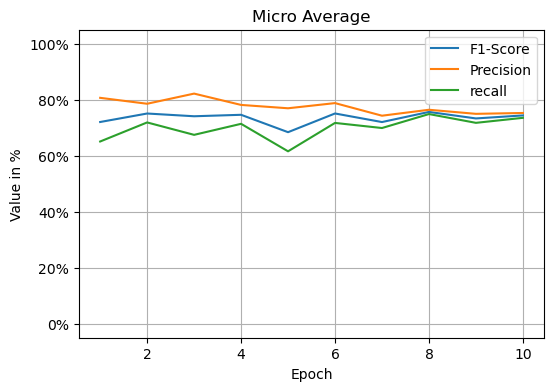

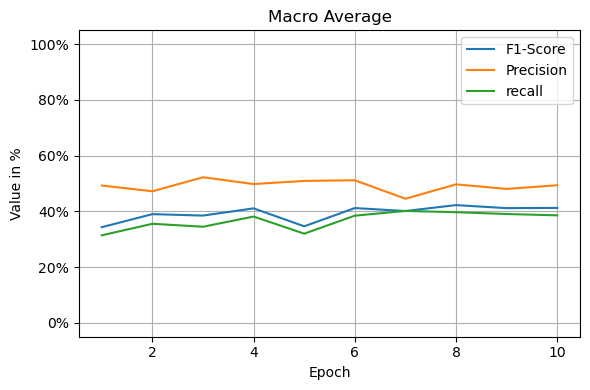

In [2]:
import pickle
from pathlib import Path

from utils.plotting import create_micro_macro_plot

model_name="resnet"
img_dir = Path("img/")
results_dir = Path("checkpoints/")

with open(f"checkpoints/{model_name}_results.pkl", "rb") as f:
    results = pickle.load(f)

create_micro_macro_plot(
    results,
    show=True,
    save_micro=str(img_dir / f"{model_name}_micro.png"),
    save_macro=str(img_dir / f"{model_name}_macro.png"),
)
